In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1RnbLw2c0bRGgrU9CeEEC6wXf9H986u7QGiSQj9155Hg/export?format=csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,Exchange Rate,R ROI,Inflation,Gov Effectiveness,BOP(Trade),Political stability
0,35.43317,1.468708,6.045948,-1.63653,1.810000e+11,-1.90759
1,36.31329,0.306232,4.826562,-1.63653,1.880000e+11,-1.90759
2,41.25937,-2.028670,11.678560,-1.81298,2.370000e+11,-2.08043
3,43.05543,2.703980,2.481793,-1.81298,3.280000e+11,-2.08043
4,44.94161,1.528818,0.632579,-1.91224,4.360000e+11,-2.08402


In [ ]:
Col = df[['R ROI','Inflation','Gov Effectiveness','BOP(Trade)','Political stability']]

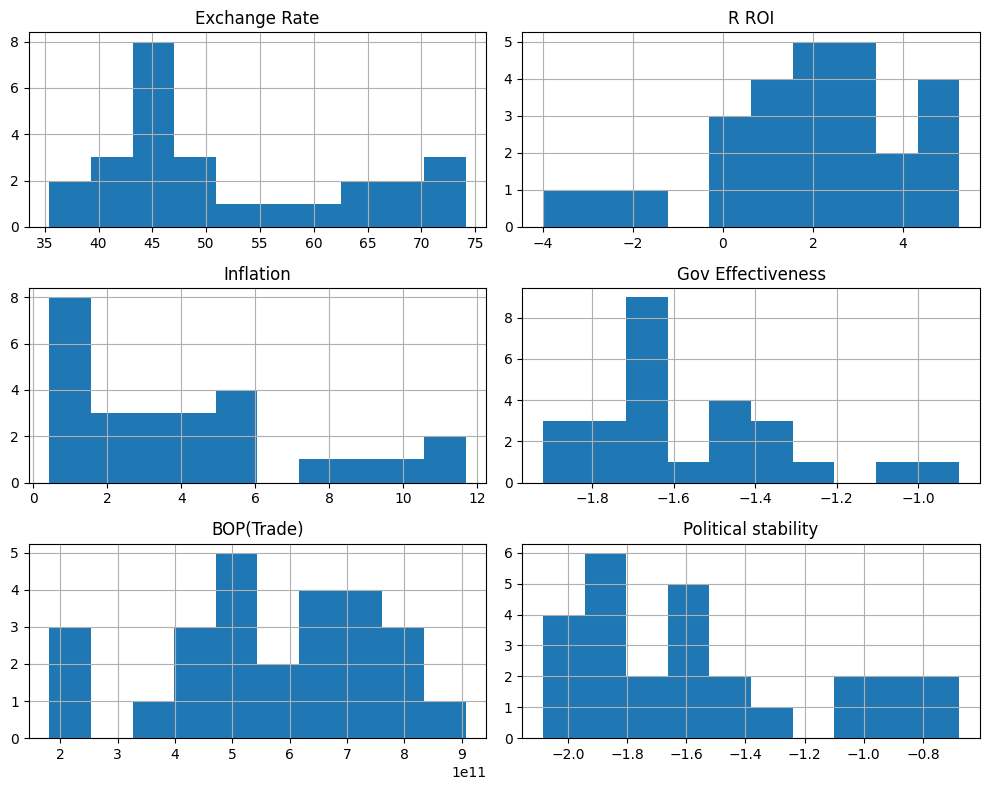

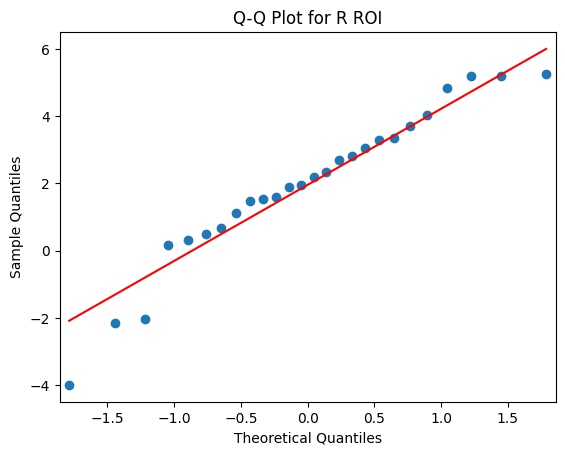

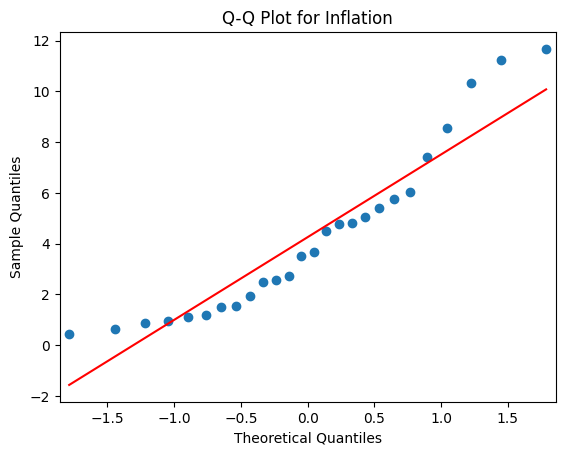

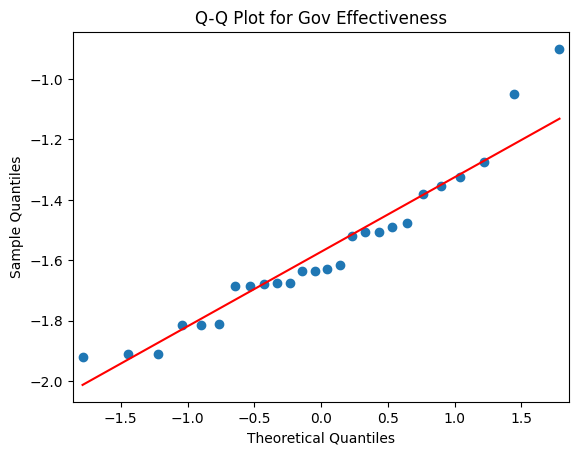

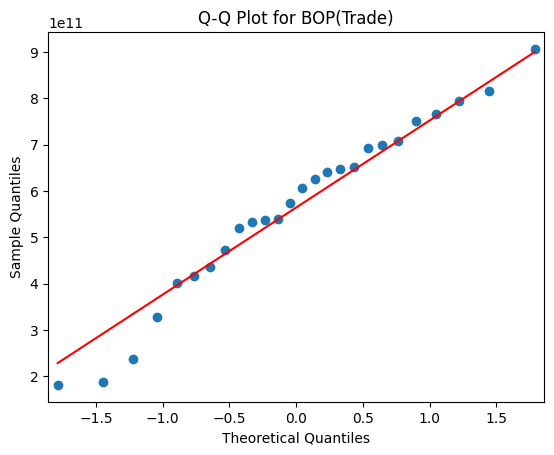

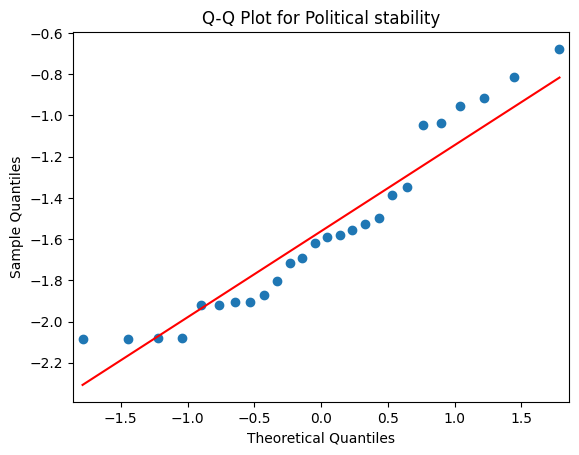

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Plot histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Plot Q-Q plots
for col in Col.columns:
    sm.qqplot(df[col], line='s')
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

In [ ]:
from scipy.stats import shapiro, kstest

# Perform Shapiro-Wilk test
for col in Col.columns:
    statistic, p_value = shapiro(df[col])
    print(f"Shapiro-Wilk Test for {col}: Statistic={statistic:.3f}, p-value={p_value:.3f}")
    if p_value > 0.05:
        print("Likely Gaussian")
    else:
        print("Likely not Gaussian")

Shapiro-Wilk Test for R ROI: Statistic=0.946, p-value=0.185
Likely Gaussian
Shapiro-Wilk Test for Inflation: Statistic=0.894, p-value=0.012
Likely not Gaussian
Shapiro-Wilk Test for Gov Effectiveness: Statistic=0.931, p-value=0.081
Likely Gaussian
Shapiro-Wilk Test for BOP(Trade): Statistic=0.966, p-value=0.525
Likely Gaussian
Shapiro-Wilk Test for Political stability: Statistic=0.917, p-value=0.038
Likely not Gaussian


Since most of the columns form gaussian distribution we used Standard scaler method for feature scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scaled = scaler.fit_transform(Col)
df[Col.columns] = num_scaled

In [ ]:
df.head()

,Exchange Rate,R ROI,Inflation,Gov Effectiveness,BOP(Trade),Political stability
0,35.43317,-0.216762,0.548502,-0.260946,-2.037003,-0.827792
1,36.31329,-0.730204,0.174741,-0.260946,-1.999799,-0.827792
2,41.25937,-1.761484,2.274989,-0.975743,-1.739374,-1.241703
3,43.05543,0.328834,-0.543969,-0.975743,-1.255726,-1.241703
4,44.94161,-0.190212,-1.110782,-1.377844,-0.681727,-1.250300


In [ ]:
import pandas as pd

correlation_matrix = df.corr()
print(correlation_matrix)

                     Exchange Rate     R ROI  Inflation  Gov Effectiveness  \
Exchange Rate             1.000000  0.396075  -0.199849           0.741508   
R ROI                     0.396075  1.000000  -0.469898           0.003086   
Inflation                -0.199849 -0.469898   1.000000           0.001815   
Gov Effectiveness         0.741508  0.003086   0.001815           1.000000   
BOP(Trade)                0.612505  0.085726  -0.416910           0.574281   
Political stability       0.644741  0.224962  -0.447738           0.637492   

                     BOP(Trade)  Political stability  
Exchange Rate          0.612505             0.644741  
R ROI                  0.085726             0.224962  
Inflation             -0.416910            -0.447738  
Gov Effectiveness      0.574281             0.637492  
BOP(Trade)             1.000000             0.763827  
Political stability    0.763827             1.000000  


Correlation between Exchange Rates and various factors
R ROI 0.396
Inflation -0.2
Gov effectiveness 0.742
BOP 0.612
Political stability 0.645

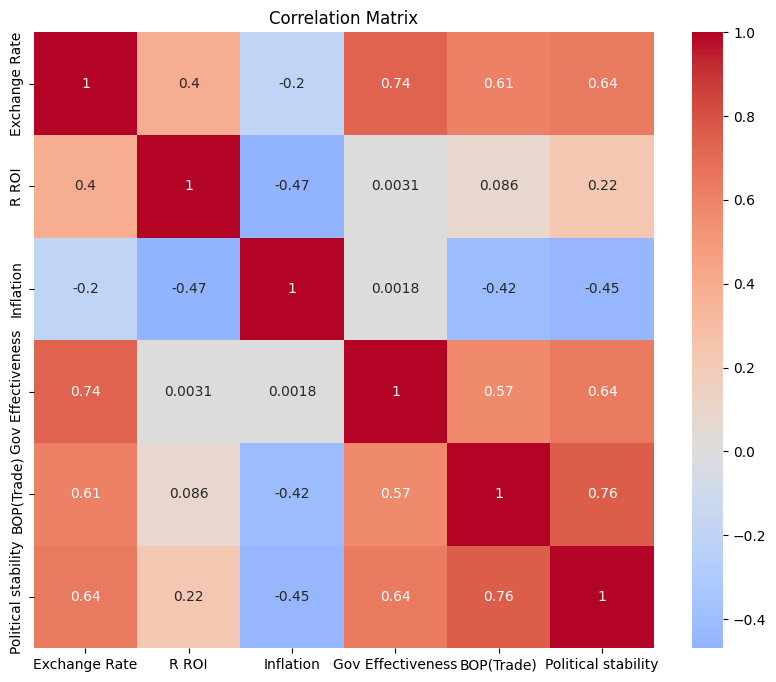

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd

X = df.drop('Exchange Rate', axis=1)

print(X.head())

      R ROI  Inflation  Gov Effectiveness  BOP(Trade)  Political stability
0 -0.216762   0.548502          -0.260946   -2.037003            -0.827792
1 -0.730204   0.174741          -0.260946   -1.999799            -0.827792
2 -1.761484   2.274989          -0.975743   -1.739374            -1.241703
3  0.328834  -0.543969          -0.975743   -1.255726            -1.241703
4 -0.190212  -1.110782          -1.377844   -0.681727            -1.250300


MODEL 1

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

              Variable       VIF
0                R ROI  1.347913
1            Inflation  1.948349
2    Gov Effectiveness  2.185222
3           BOP(Trade)  2.741432
4  Political stability  3.352661


No problematic level of collinearity

In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
X = df.drop('Exchange Rate', axis=1)
# Add a constant to the exogenous variables
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     12.01
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.83e-05
Time:                        17:32:09   Log-Likelihood:                -82.596
No. Observations:                  26   AIC:                             177.2
Df Residuals:                      20   BIC:                             184.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  52.3124    

In [ ]:


from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid,  model.model.exog)

# Extract results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 20.628098470767096, 'Test Statistic p-value': 0.41930538447969645, 'F-Statistic': 0.9599998417000365, 'F-Test p-value': 0.5792054919049106}


R-squared: 0.7501070337213027
Adjusted R-squared: 0.6876337921516285
F-statistic: 12.006853092211218
F-test p-value: 1.8306390113086963e-05


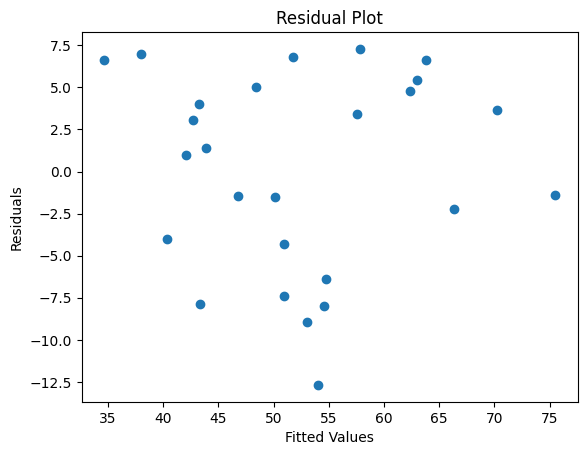

In [ ]:
# Print R-squared and adjusted R-squared
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

# Print F-statistic and its p-value
print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

# Plot residuals
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Add a constant to the training data
X_train = sm.add_constant(X_train)

# Fit the model to the training data
model = sm.OLS(y_train, X_train).fit()

In [ ]:
# Add a constant to the testing data
X_test = sm.add_constant(X_test)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Set squared=False for RMSE
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 105.80072555738262
Root Mean Squared Error (RMSE): 10.285947965908763
Mean Absolute Error (MAE): 9.218190306223821


MODEL 2

In [ ]:
X1= df[['R ROI','Inflation','BOP(Trade)']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif1 = pd.DataFrame()
vif1["Variable"] = X1.columns
vif1["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif1)


     Variable       VIF
0       R ROI  1.308040
1   Inflation  1.571592
2  BOP(Trade)  1.233644


In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
# Add a constant to the exogenous variables
X1 = sm.add_constant(X1)
model = sm.OLS(y, X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     9.357
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           0.000352
Time:                        17:32:10   Log-Likelihood:                -89.933
No. Observations:                  26   AIC:                             187.9
Df Residuals:                      22   BIC:                             192.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.3124      1.640     31.905      0.0


heteroskedasticity exists

> Add blockquote



In [ ]:


# Correcting for heteroskedasticity using White's robust standard errors
robust_model = sm.OLS(model.model.endog, model.model.exog).fit(cov_type='HC0')

# Print the robust standard errors
print(robust_model.bse)

[1.5082609  1.19157462 1.31245234 1.42739762]


In [ ]:
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     26.88
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.52e-07
Time:                        17:32:10   Log-Likelihood:                -89.933
No. Observations:                  26   AIC:                             187.9
Df Residuals:                      22   BIC:                             192.9
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.3124      1.508     34.684      0.0

X1- R RO1 X2- Inflation X3-BOP

R-squared: 0.5606229007764284
Adjusted R-squared: 0.5007078417913959
F-statistic: 26.880170680831885
F-test p-value: 1.5210448824963103e-07


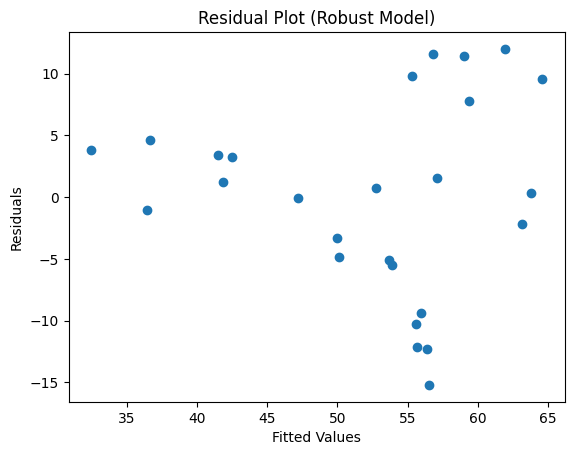

In [ ]:
# Assuming 'robust_model' is your fitted OLS model with robust standard errors
print("R-squared:", robust_model.rsquared)
print("Adjusted R-squared:", robust_model.rsquared_adj)

# Print F-statistic and its p-value
print("F-statistic:", robust_model.fvalue)
print("F-test p-value:", robust_model.f_pvalue)

# Plot residuals for the robust model
import matplotlib.pyplot as plt
plt.scatter(robust_model.fittedvalues, robust_model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Robust Model)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are your training data
robust_model = sm.OLS(y_train, X_train).fit(cov_type='HC0')

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = robust_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 137.88918675658795
RMSE: 11.742622652397033
MAE: 9.436910442208253


MODEL 3

In [ ]:
X2= df[['R ROI','Gov Effectiveness','BOP(Trade)']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()
vif2["Variable"] = X2.columns
vif2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)



            Variable       VIF
0              R ROI  1.010638
1  Gov Effectiveness  1.496880
2         BOP(Trade)  1.507948


In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
# Add a constant to the exogenous variables
X2 = sm.add_constant(X2)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     20.92
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.21e-06
Time:                        17:32:11   Log-Likelihood:                -83.087
No. Observations:                  26   AIC:                             174.2
Df Residuals:                      22   BIC:                             179.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.3124      1.26

In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid,  model.model.exog)

# Extract results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 10.696705993080997, 'Test Statistic p-value': 0.29707236037906676, 'F-Statistic': 1.2426322203130902, 'F-Test p-value': 0.3372241224664229}


R-squared: 0.7404858255518829
Adjusted R-squared: 0.7050975290362306
F-statistic: 20.924596503942038
F-test p-value: 1.2141382051291869e-06


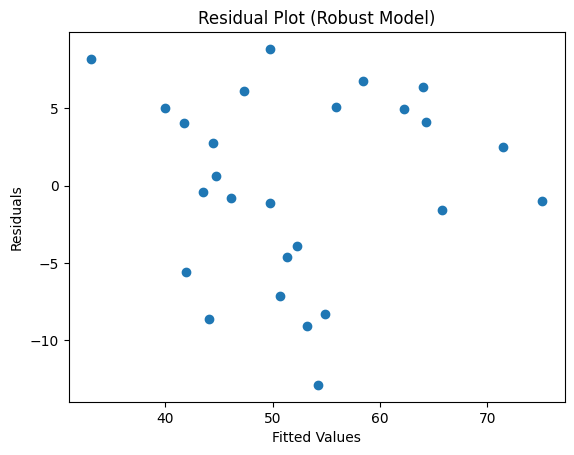

In [ ]:
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Robust Model)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are your training data
model = sm.OLS(y_train, X_train).fit()

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 78.75482821491124
RMSE: 8.874391709571492
MAE: 7.531941332866379


MODEL 4

In [ ]:
X3=df[['R ROI','BOP(Trade)','Political stability']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif3 = pd.DataFrame()
vif3["Variable"] = X3.columns
vif3["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
print(vif3)


              Variable       VIF
0                R ROI  1.073430
1           BOP(Trade)  2.446427
2  Political stability  2.557898


In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
# Add a constant to the exogenous variables
X3 = sm.add_constant(X3)
model = sm.OLS(y, X3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     8.335
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           0.000690
Time:                        17:32:11   Log-Likelihood:                -90.754
No. Observations:                  26   AIC:                             189.5
Df Residuals:                      22   BIC:                             194.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  52.3124    

In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid,  model.model.exog)

# Extract results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 11.262388868680624, 'Test Statistic p-value': 0.25815146794750155, 'F-Statistic': 1.358566492020051, 'F-Test p-value': 0.2838743104537924}


R-squared: 0.5319562280964316
Adjusted R-squared: 0.46813207738230855
F-statistic: 8.334716908010824
F-test p-value: 0.0006898771120761297


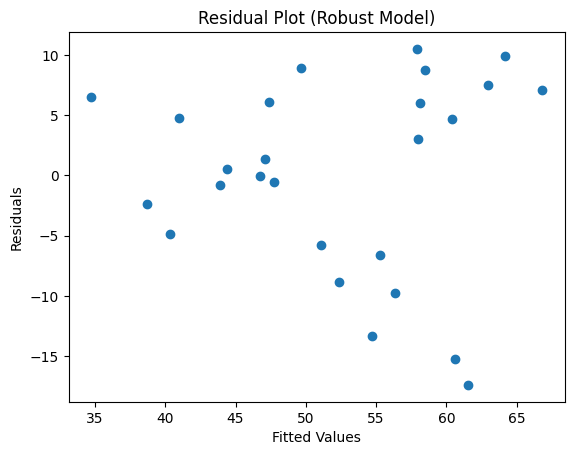

In [ ]:
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Robust Model)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are your training data
model = sm.OLS(y_train, X_train).fit()

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 207.148439141794
RMSE: 14.392652262241105
MAE: 12.461565827817203


MODEL 5

In [ ]:
X2= df[['R ROI','Gov Effectiveness','Inflation']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()
vif2["Variable"] = X2.columns
vif2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)

            Variable       VIF
0              R ROI  1.283400
1  Gov Effectiveness  1.000023
2          Inflation  1.283392


In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
# Add a constant to the exogenous variables
X2 = sm.add_constant(X2)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     17.55
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           4.82e-06
Time:                        17:32:12   Log-Likelihood:                -84.743
No. Observations:                  26   AIC:                             177.5
Df Residuals:                      22   BIC:                             182.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.3124      1.34

In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid,  model.model.exog)

# Extract results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 9.885236348742959, 'Test Statistic p-value': 0.3598557058596057, 'F-Statistic': 1.090537465469158, 'F-Test p-value': 0.42064430215279747}


R-squared: 0.7052386893325735
Adjusted R-squared: 0.6650439651506517
F-statistic: 17.545553643822885
F-test p-value: 4.822253585622602e-06


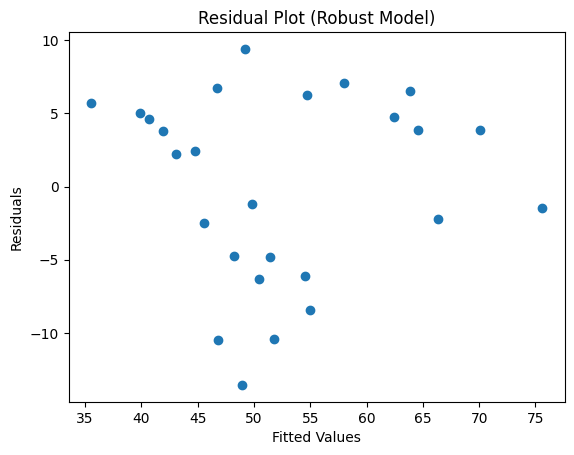

In [ ]:
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Robust Model)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are your training data
model = sm.OLS(y_train, X_train).fit()

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 79.33647645687675
RMSE: 8.907102584840748
MAE: 7.689535490232543


MODEL 6

In [ ]:
X2= df[['R ROI','Political stability','Inflation']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()
vif2["Variable"] = X2.columns
vif2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)

              Variable       VIF
0                R ROI  1.283812
1  Political stability  1.251160
2            Inflation  1.524444


In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
# Add a constant to the exogenous variables
X2 = sm.add_constant(X2)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     8.439
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           0.000643
Time:                        17:32:12   Log-Likelihood:                -90.668
No. Observations:                  26   AIC:                             189.3
Df Residuals:                      22   BIC:                             194.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  52.3124    

In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid,  model.model.exog)

# Extract results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 12.857424893336566, 'Test Statistic p-value': 0.16916447245812352, 'F-Statistic': 1.7392059067048038, 'F-Test p-value': 0.16011325944648455}


R-squared: 0.5350569978208168
Adjusted R-squared: 0.4716556793418373
F-statistic: 8.439209320200698
F-test p-value: 0.0006428362885493014


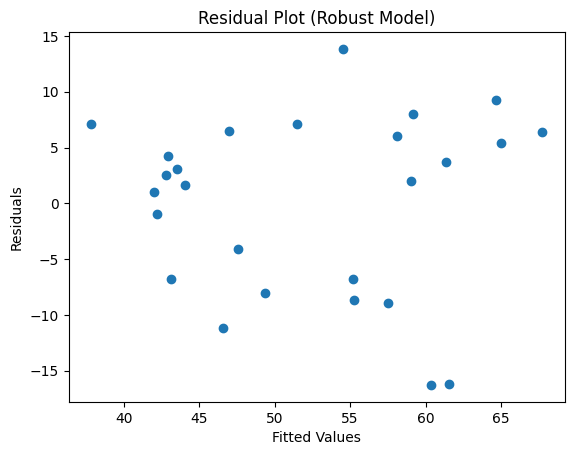

In [ ]:
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Robust Model)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are your training data
model = sm.OLS(y_train, X_train).fit()

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 210.11332730610698
RMSE: 14.495286382341916
MAE: 12.513758015941633


MODEL 7

In [ ]:
X2= df[['BOP(Trade)','Gov Effectiveness','Inflation']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()
vif2["Variable"] = X2.columns
vif2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)

            Variable       VIF
0         BOP(Trade)  2.018097
1  Gov Effectiveness  1.667329
2          Inflation  1.352535


In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
# Add a constant to the exogenous variables
X2 = sm.add_constant(X2)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     11.55
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           9.43e-05
Time:                        17:32:13   Log-Likelihood:                -88.331
No. Observations:                  26   AIC:                             184.7
Df Residuals:                      22   BIC:                             189.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.3124      1.54

In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid,  model.model.exog)

# Extract results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 14.594614819210637, 'Test Statistic p-value': 0.10269015930288336, 'F-Statistic': 2.274888702971731, 'F-Test p-value': 0.07262395148140666}


R-squared: 0.611550225377717
Adjusted R-squared: 0.5585798015655874
F-statistic: 11.54512615467654
F-test p-value: 9.429977509926725e-05


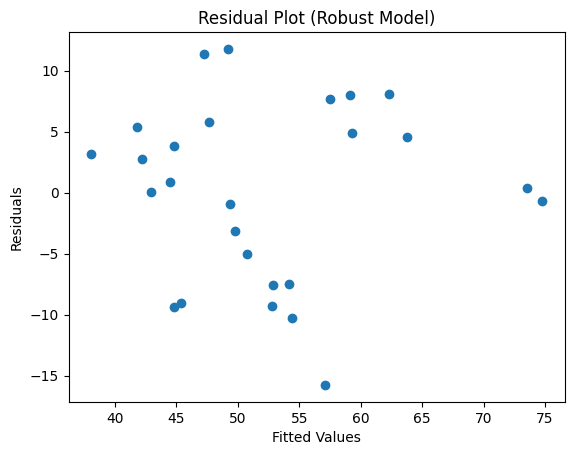

In [ ]:
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Robust Model)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are your training data
model = sm.OLS(y_train, X_train).fit()

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 101.35825692988347
RMSE: 10.067683791711154
MAE: 8.17939260281232


MODEL 8

In [ ]:
X2= df[['R ROI','BOP(Trade)','Gov Effectiveness','Inflation']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()
vif2["Variable"] = X2.columns
vif2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)

            Variable       VIF
0              R ROI  1.326851
1         BOP(Trade)  2.086422
2  Gov Effectiveness  1.691307
3          Inflation  1.775723


In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
# Add a constant to the exogenous variables
X2 = sm.add_constant(X2)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     15.71
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           4.31e-06
Time:                        17:32:13   Log-Likelihood:                -82.624
No. Observations:                  26   AIC:                             175.2
Df Residuals:                      21   BIC:                             181.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.3124      1.26

In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid,  model.model.exog)

# Extract results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 16.631800950302296, 'Test Statistic p-value': 0.2763305413512985, 'F-Statistic': 1.3949152376550564, 'F-Test p-value': 0.2930585910731092}


R-squared: 0.7495697241120446
Adjusted R-squared: 0.7018687191810055
F-statistic: 15.713918924678632
F-test p-value: 4.30684219726193e-06


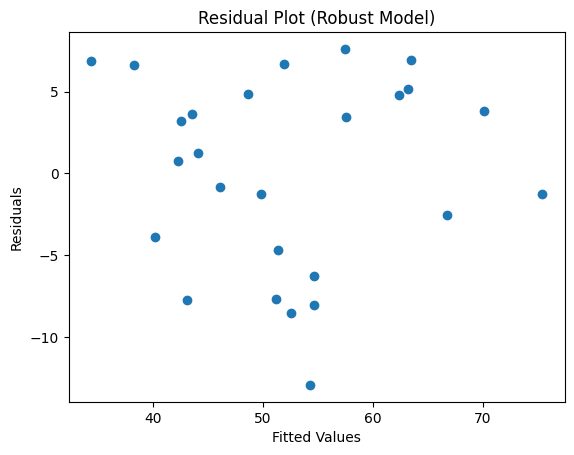

In [ ]:
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Robust Model)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are your training data
model = sm.OLS(y_train, X_train).fit()

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 76.39128151541077
RMSE: 8.740210610472197
MAE: 7.368191522971606


MODEL 9

In [ ]:
X2= df[['BOP(Trade)','Political stability','Inflation']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()
vif2["Variable"] = X2.columns
vif2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)

              Variable       VIF
0           BOP(Trade)  2.441709
1  Political stability  2.523111
2            Inflation  1.272171


In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
# Add a constant to the exogenous variables
X2 = sm.add_constant(X2)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     6.394
Date:                Sat, 06 Jul 2024   Prob (F-statistic):            0.00279
Time:                        17:32:14   Log-Likelihood:                -92.473
No. Observations:                  26   AIC:                             192.9
Df Residuals:                      22   BIC:                             198.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  52.3124    

In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid,  model.model.exog)

# Extract results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 11.022928163420916, 'Test Statistic p-value': 0.27414060202391527, 'F-Statistic': 1.3084210951776085, 'F-Test p-value': 0.3059138114311492}


R-squared: 0.46578802488622595
Adjusted R-squared: 0.39294093737071123
F-statistic: 6.394051440794039
F-test p-value: 0.00279226509688066


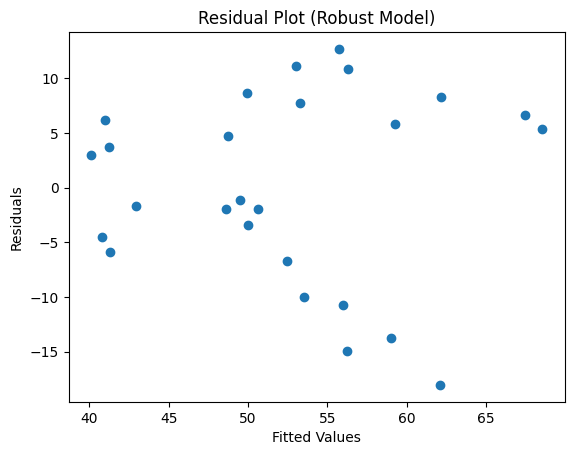

In [ ]:
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Robust Model)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are your training data
model = sm.OLS(y_train, X_train).fit()

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 224.30988801539402
RMSE: 14.976978601019434
MAE: 12.637323554714584


MODEL 10

In [ ]:
X2= df[['R ROI','BOP(Trade)','Political stability','Inflation']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()
vif2["Variable"] = X2.columns
vif2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)

              Variable       VIF
0                R ROI  1.345244
1           BOP(Trade)  2.558547
2  Political stability  2.594875
3            Inflation  1.594310


In [ ]:
import statsmodels.api as sm

y = df['Exchange Rate']
# Add a constant to the exogenous variables
X2 = sm.add_constant(X2)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exchange Rate   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     8.287
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           0.000356
Time:                        17:32:15   Log-Likelihood:                -88.310
No. Observations:                  26   AIC:                             186.6
Df Residuals:                      21   BIC:                             192.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  52.3124    

In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid,  model.model.exog)

# Extract results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 20.453213680604733, 'Test Statistic p-value': 0.11648785660672901, 'F-Statistic': 2.897241979815452, 'F-Test p-value': 0.0415766414924883}



heteroskedasticity exists

> Add blockquote



In [ ]:


# Correcting for heteroskedasticity using White's robust standard errors
robust_model = sm.OLS(model.model.endog, model.model.exog).fit(cov_type='HC0')

# Print the robust standard errors
print(robust_model.bse)

[1.41702062 1.05335065 1.83848261 2.31203623 1.4268293 ]


In [ ]:
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     26.20
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           6.70e-08
Time:                        17:32:15   Log-Likelihood:                -88.310
No. Observations:                  26   AIC:                             186.6
Df Residuals:                      21   BIC:                             192.9
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.3124      1.417     36.917      0.0

R-squared: 0.6121740956248831
Adjusted R-squared: 0.5383024947915276
F-statistic: 26.197301203387312
F-test p-value: 6.697630127494656e-08


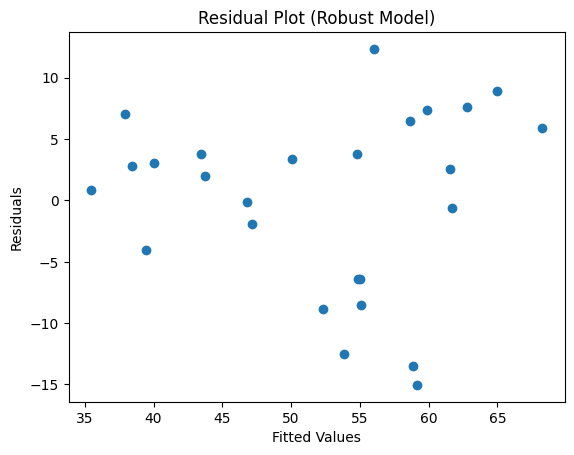

In [ ]:
# Assuming 'robust_model' is your fitted OLS model with robust standard errors
print("R-squared:", robust_model.rsquared)
print("Adjusted R-squared:", robust_model.rsquared_adj)

# Print F-statistic and its p-value
print("F-statistic:", robust_model.fvalue)
print("F-test p-value:", robust_model.f_pvalue)

# Plot residuals for the robust model
import matplotlib.pyplot as plt
plt.scatter(robust_model.fittedvalues, robust_model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Robust Model)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
# Adjust 'test_size' (e.g., 0.2 for 20% testing data) and 'random_state' as needed

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are your training data
robust_model = sm.OLS(y_train, X_train).fit(cov_type='HC0')

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
y_pred = robust_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 137.88918675658795
RMSE: 11.742622652397033
MAE: 9.436910442208253


The 3 best models were:

**MODEL 8**

FX = 52.3124 + 4.9651*R ROI + 3.5286 *BOP(TRADE) + 6.5588 * Gov Effectiveness + 1.4736 * Inflation

**MODEL 3**

FX = 52.3124 + 4.3432 * R ROI + 2.6875 * BOP(TRADE) + 6.5588 * Gov Effectiveness

**MODEL 5**

FX = 52.3124 + 4.4559*R ROI + 8.5899 * Gov Effectiveness - 0.2405 * Inflation